In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Load data
df = pd.read_csv('maternal_health_risk.csv')

df.head()
df.info()
df.describe()
df['RiskLevel'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


RiskLevel
low risk     406
mid risk     336
high risk    272
Name: count, dtype: int64

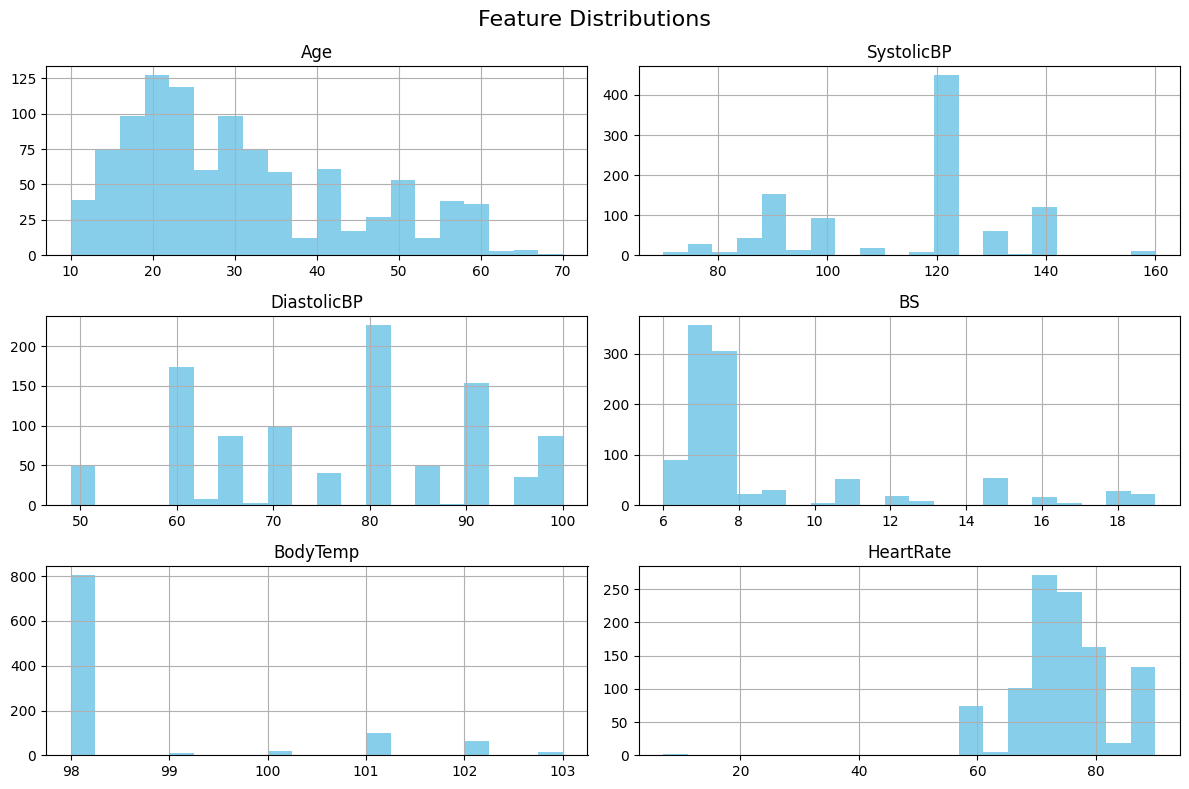

In [12]:
# Histograms for continuous variables
df.hist(bins=20, figsize=(12, 8), color='skyblue')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

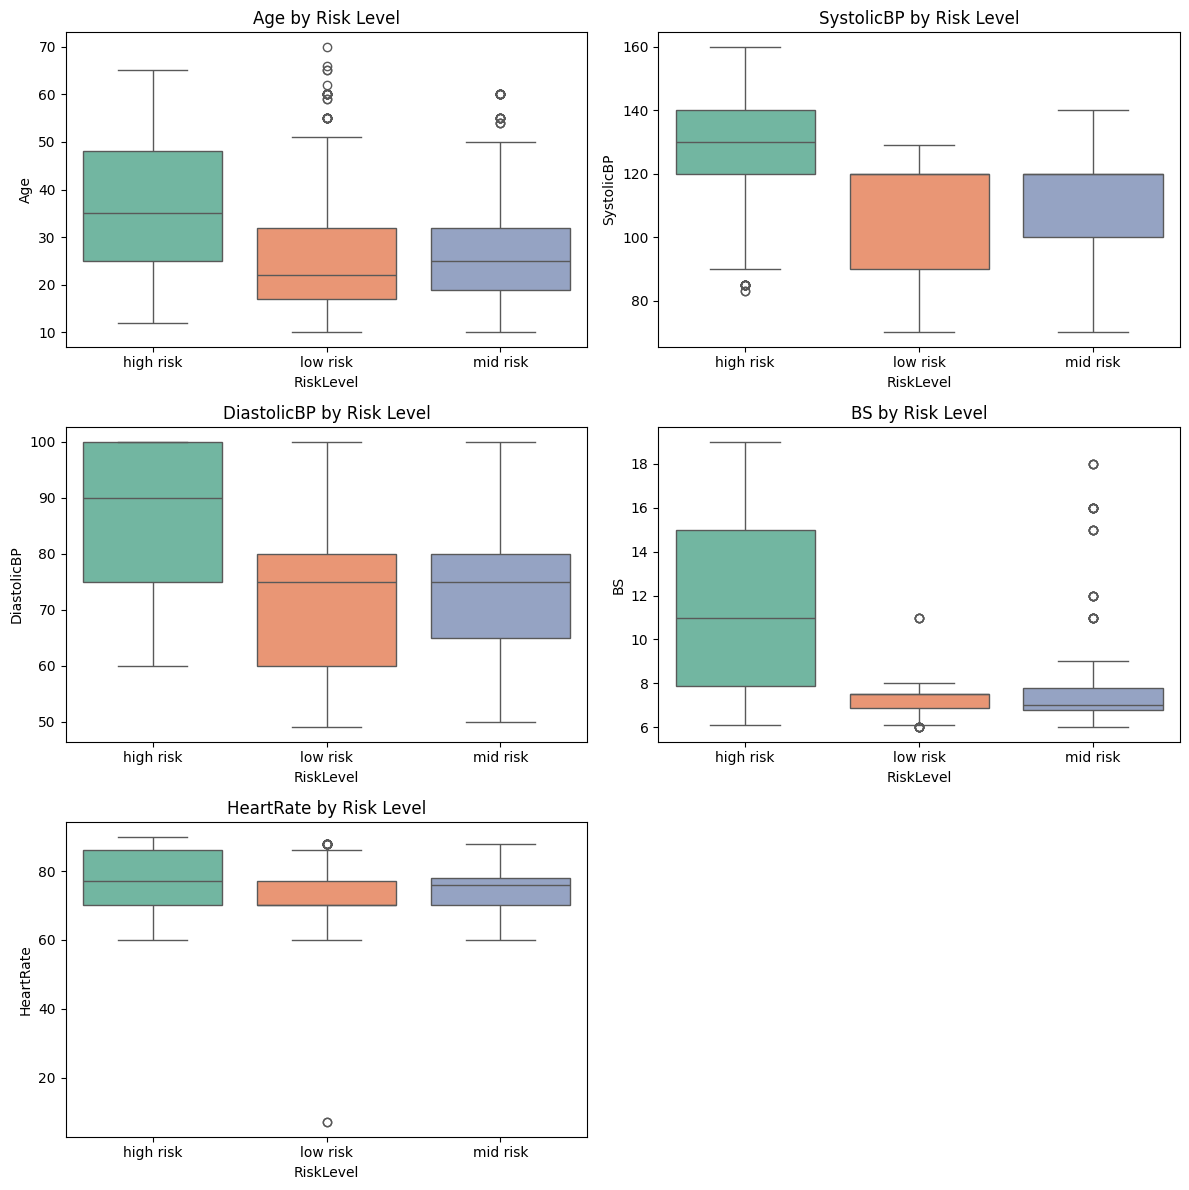

In [60]:
# Boxplots grouped by Risk Level
features = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'HeartRate']
rows, cols = 3, 2  # 3 rows, 2 columns
fig, axes = plt.subplots(rows, cols, figsize=(12, 12))  # total 6 spaces
# Flatten axes for easy indexing, hide the last unused axis
axes = axes.flatten()

for i, col in enumerate(features):
    ax = axes[i]
    sns.boxplot(x='RiskLevel', y=col, data=df, palette='Set2', hue='RiskLevel', ax=ax, legend=False)
    ax.set_title(f'{col} by Risk Level')

# Hide the last (6th) subplot since we only have 5 plots
axes[-1].axis('off')
plt.tight_layout()
plt.show()

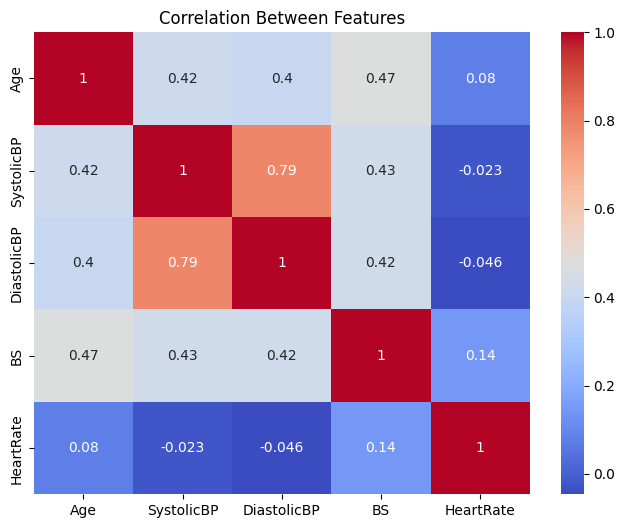

In [18]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Features")
plt.show()

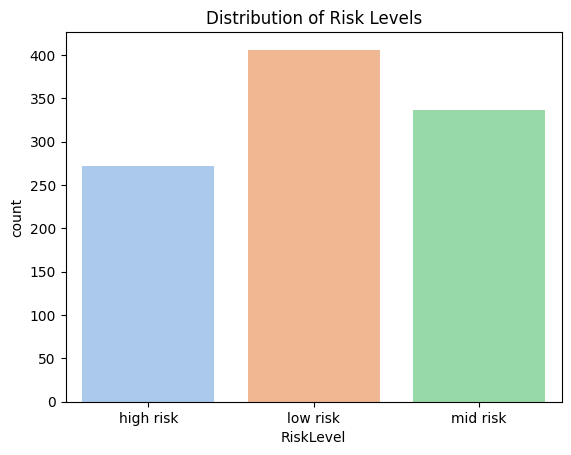

In [20]:
# RiskLevel count plot
sns.countplot(x='RiskLevel', data=df, palette='pastel', hue='RiskLevel', legend=False)
plt.title("Distribution of Risk Levels")
plt.show()

## Data Modeling

In [34]:
# Prepare data for modeling
# Encode target variable
le = LabelEncoder()
df['RiskLevel_encoded'] = le.fit_transform(df['RiskLevel'])

# Scale numerical features
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[features] = scaler.fit_transform(df[features])


In [38]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Convert RiskLevel to numeric for future modeling
le = LabelEncoder()
df['RiskLevel_encoded'] = le.fit_transform(df['RiskLevel'])

# Standardize numerical features (important for many ML models)
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[features] = scaler.fit_transform(df[features])

# View processed features
df_scaled.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,RiskLevel_encoded
0,-0.361738,0.913396,0.255023,1.905890,98.0,1.446956,high risk,0
1,0.380777,1.457027,0.975539,1.298340,98.0,-0.532088,high risk,0
2,-0.064732,-1.261127,-0.465493,-0.220537,100.0,0.704815,high risk,0
3,0.009519,1.457027,0.615281,-0.524312,98.0,-0.532088,high risk,0
4,0.380777,0.369765,-1.186009,-0.797710,98.0,0.210054,low risk,1


In [45]:
# Features and target
X = df_scaled[features]
y = df_scaled['RiskLevel_encoded']

# Split into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Train model
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)

# Predict
y_pred_lr = lr.predict(X_test)

# Evaluate
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_lr, target_names=le.classes_))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Logistic Regression Performance:
              precision    recall  f1-score   support

   high risk       0.84      0.75      0.79        55
    low risk       0.55      0.78      0.65        81
    mid risk       0.50      0.30      0.37        67

    accuracy                           0.61       203
   macro avg       0.63      0.61      0.60       203
weighted avg       0.61      0.61      0.59       203

Confusion Matrix:
 [[41  9  5]
 [ 3 63 15]
 [ 5 42 20]]


In [49]:
from sklearn.ensemble import RandomForestClassifier

# Train model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluate
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Performance:
              precision    recall  f1-score   support

   high risk       0.96      0.91      0.93        55
    low risk       0.91      0.84      0.87        81
    mid risk       0.76      0.87      0.81        67

    accuracy                           0.87       203
   macro avg       0.88      0.87      0.87       203
weighted avg       0.87      0.87      0.87       203

Confusion Matrix:
 [[50  0  5]
 [ 0 68 13]
 [ 2  7 58]]
